In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [17]:
data = pd.read_csv('/Users/CarlosKAustin/Downloads/gun_violence.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [19]:
#displaying columns
data.columns


Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [20]:
#dropping columns
data = data.drop(['incident_id', 'address',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'], axis=1)
      

In [21]:
data.head()

,date,state,city_or_county,n_killed
0,2013-01-01,Pennsylvania,Mckeesport,0
1,2013-01-01,California,Hawthorne,1
2,2013-01-01,Ohio,Lorain,1
3,2013-01-05,Colorado,Aurora,4
4,2013-01-07,North Carolina,Greensboro,2


In [29]:
#cities with the most murders
top_cities = data.groupby('city_or_county')['n_killed'].sum().sort_values(ascending=False).head(10).reset_index()
top_cities

,city_or_county,n_killed
0,Chicago,2104
1,Houston,1145
2,Baltimore,1055
3,Saint Louis,919
4,Philadelphia,901
5,New Orleans,703
6,Los Angeles,636
7,Memphis,623
8,Indianapolis,616
9,Detroit,604


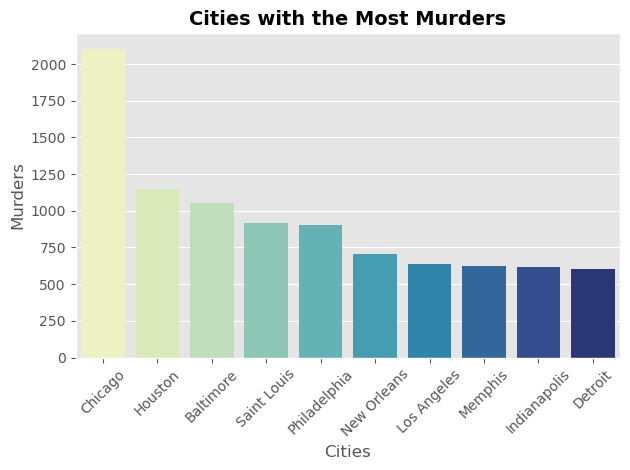

In [36]:
sns.barplot(data=top_cities, x='city_or_county', y='n_killed', hue='city_or_county', palette='YlGnBu')

plt.title("Cities with the Most Murders", fontsize=14, fontweight="bold")
plt.xlabel("Cities")
plt.ylabel("Murders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

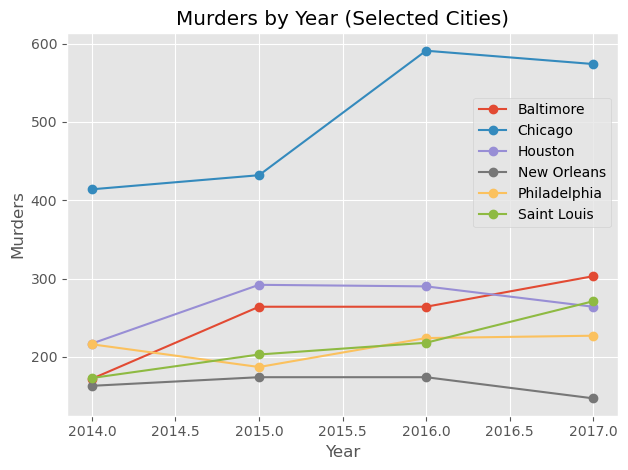

In [65]:
#Time Plot Series for Top 5 Cities
cities = ["Chicago", "Houston", "Baltimore",'Saint Louis', 'Philadelphia', 'New Orleans']
sel = data[data["city_or_county"].isin(cities)].copy()
sel["date"] = pd.to_datetime(sel["date"], errors="coerce")

yearly_multi = (sel
    .assign(year=sel["date"].dt.year)
    .groupby(["city_or_county","year"])["n_killed"]
    .sum()
    .reset_index())

# Drop 2013 and 2018 due to lack of data during those years
yearly_multi = yearly_multi[~yearly_multi["year"].isin([2013, 2018])]

for city, sub in yearly_multi.groupby("city_or_county"):
    sub = sub[sub["n_killed"] > 0]
    plt.plot(sub["year"], sub["n_killed"], marker="o", label=city)

plt.title("Murders by Year (Selected Cities)")
plt.xlabel("Year")
plt.ylabel("Murders")
plt.legend(loc = 'upper right', bbox_to_anchor=(1, .85))
plt.tight_layout()
plt.show()